### Load necessary packages, get the data

In [1]:
import pandas as pd
import numpy as np
cervical_cancer_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv")

### Take a quick peek

In [2]:
cervical_cancer_data.head()

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ...    \
0                             0.0  0.0  ...     
1                             0.0  0.0  ...     
2                             0.0  0.0  ...     
3                             3.0  0.0  ...     
4                            15.0  0.0  ...     

  STDs: Time since first diagnosis STDs: Time since last diagnosis Dx:Cancer  \
0                                ?                               ?         0   
1                                ?                               ?         0   
2                                ?                               ?         0   
3                                ?                               ?         1   
4                                ?                               ?         0   

  Dx:CIN Dx:HPV Dx Hinselmann Schiller Citology Biopsy  
0      0      0  0          0        0        0      0  
1      0      0  0          0        0        0      0  
2      0      0  0          0        0        0      0  
3      0      1  0          0        0        0      0  
4      0      0  0          0        0        0      0  

[5 rows x 36 columns]

### Get a glimpse of the column types

In [3]:
cervical_cancer_data.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

### Read data in again, making question marks into "NaN" 

In [4]:
cervical_cancer_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv",
                                  na_values="?")

### Take a peek now!

In [5]:
cervical_cancer_data.head()

Age  Number of sexual partners  First sexual intercourse  \
0   18                        4.0                      15.0   
1   15                        1.0                      14.0   
2   34                        1.0                       NaN   
3   52                        5.0                      16.0   
4   46                        3.0                      21.0   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                 1.0     0.0             0.0                  0.0   
1                 1.0     0.0             0.0                  0.0   
2                 1.0     0.0             0.0                  0.0   
3                 4.0     1.0            37.0                 37.0   
4                 4.0     0.0             0.0                  0.0   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD   ...    \
0                      0.0                              0.0  0.0   ...     
1                      0.0                              0.0  0.0   ...     
2                      0.0                              0.0  0.0   ...     
3                      1.0                              3.0  0.0   ...     
4                      1.0                             15.0  0.0   ...     

   STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   

   Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Hinselmann  Schiller  Citology  Biopsy  
0          0       0       0   0           0         0         0       0  
1          0       0       0   0           0         0         0       0  
2          0       0       0   0           0         0         0       0  
3          1       0       1   0           0         0         0       0  
4          0       0       0   0           0         0         0       0  

[5 rows x 36 columns]

### Get summary statistics

In [6]:
cervical_cancer_data.describe()

Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 832.000000                851.000000   
mean    26.820513                   2.527644                 16.995300   
std      8.497948                   1.667760                  2.803355   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          802.000000  845.000000      845.000000           845.000000   
mean             2.275561    0.145562        1.219721             0.453144   
std              1.447414    0.352876        4.089017             2.226610   
min              0.000000    0.000000        0.000000             0.000000   
25%              1.000000    0.000000        0.000000             0.000000   
50%              2.000000    0.000000        0.000000             0.000000   
75%              3.000000    0.000000        0.000000             0.000000   
max             11.000000    1.000000       37.000000            37.000000   

       Hormonal Contraceptives  Hormonal Contraceptives (years)         IUD  \
count               750.000000                       750.000000  741.000000   
mean                  0.641333                         2.256419    0.112011   
std                   0.479929                         3.764254    0.315593   
min                   0.000000                         0.000000    0.000000   
25%                   0.000000                         0.000000    0.000000   
50%                   1.000000                         0.500000    0.000000   
75%                   1.000000                         3.000000    0.000000   
max                   1.000000                        30.000000    1.000000   

          ...      STDs: Time since first diagnosis  \
count     ...                             71.000000   
mean      ...                              6.140845   
std       ...                              5.895024   
min       ...                              1.000000   
25%       ...                              2.000000   
50%       ...                              4.000000   
75%       ...                              8.000000   
max       ...                             22.000000   

       STDs: Time since last diagnosis   Dx:Cancer      Dx:CIN      Dx:HPV  \
count                        71.000000  858.000000  858.000000  858.000000   
mean                          5.816901    0.020979    0.010490    0.020979   
std                           5.755271    0.143398    0.101939    0.143398   
min                           1.000000    0.000000    0.000000    0.000000   
25%                           2.000000    0.000000    0.000000    0.000000   
50%                           3.000000    0.000000    0.000000    0.000000   
75%                           7.500000    0.000000    0.000000    0.000000   
max                          22.000000    1.000000    1.000000    1.000000   

               Dx  Hinselmann    Schiller    Citology      Biopsy  
count  858.000000  858.000000  858.000000  858.000000  858.000000  
mean     0.027972    0.040793    0.086247    0.051282    0.064103  
std      0.164989    0.197925    0.280892    0.220701    0.245078  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000  

[8 rows x 36 columns]

### Do we like our column names?

In [7]:
cervical_cancer_data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

### These column names won't work well for other researchers using other packages.

We'll make them lowercase and change any spaces or punctuation to underscore.  We'll need the regular expressions, or "re" library to do this.

In [8]:
cervical_cancer_data.columns = cervical_cancer_data.columns.str.lower()

In [9]:
cervical_cancer_data.columns

Index(['age', 'number of sexual partners', 'first sexual intercourse',
       'num of pregnancies', 'smokes', 'smokes (years)', 'smokes (packs/year)',
       'hormonal contraceptives', 'hormonal contraceptives (years)', 'iud',
       'iud (years)', 'stds', 'stds (number)', 'stds:condylomatosis',
       'stds:cervical condylomatosis', 'stds:vaginal condylomatosis',
       'stds:vulvo-perineal condylomatosis', 'stds:syphilis',
       'stds:pelvic inflammatory disease', 'stds:genital herpes',
       'stds:molluscum contagiosum', 'stds:aids', 'stds:hiv',
       'stds:hepatitis b', 'stds:hpv', 'stds: number of diagnosis',
       'stds: time since first diagnosis', 'stds: time since last diagnosis',
       'dx:cancer', 'dx:cin', 'dx:hpv', 'dx', 'hinselmann', 'schiller',
       'citology', 'biopsy'],
      dtype='object')

In [10]:
import re

In [11]:
cervical_cancer_data.columns = [re.sub('[^a-z]+', '_', col) for col in cervical_cancer_data.columns]
cervical_cancer_data.columns

Index(['age', 'number_of_sexual_partners', 'first_sexual_intercourse',
       'num_of_pregnancies', 'smokes', 'smokes_years_', 'smokes_packs_year_',
       'hormonal_contraceptives', 'hormonal_contraceptives_years_', 'iud',
       'iud_years_', 'stds', 'stds_number_', 'stds_condylomatosis',
       'stds_cervical_condylomatosis', 'stds_vaginal_condylomatosis',
       'stds_vulvo_perineal_condylomatosis', 'stds_syphilis',
       'stds_pelvic_inflammatory_disease', 'stds_genital_herpes',
       'stds_molluscum_contagiosum', 'stds_aids', 'stds_hiv',
       'stds_hepatitis_b', 'stds_hpv', 'stds_number_of_diagnosis',
       'stds_time_since_first_diagnosis', 'stds_time_since_last_diagnosis',
       'dx_cancer', 'dx_cin', 'dx_hpv', 'dx', 'hinselmann', 'schiller',
       'citology', 'biopsy'],
      dtype='object')

In [12]:
cervical_cancer_data.columns = [re.sub('_$', '', col) for col in cervical_cancer_data.columns]
cervical_cancer_data.columns

Index(['age', 'number_of_sexual_partners', 'first_sexual_intercourse',
       'num_of_pregnancies', 'smokes', 'smokes_years', 'smokes_packs_year',
       'hormonal_contraceptives', 'hormonal_contraceptives_years', 'iud',
       'iud_years', 'stds', 'stds_number', 'stds_condylomatosis',
       'stds_cervical_condylomatosis', 'stds_vaginal_condylomatosis',
       'stds_vulvo_perineal_condylomatosis', 'stds_syphilis',
       'stds_pelvic_inflammatory_disease', 'stds_genital_herpes',
       'stds_molluscum_contagiosum', 'stds_aids', 'stds_hiv',
       'stds_hepatitis_b', 'stds_hpv', 'stds_number_of_diagnosis',
       'stds_time_since_first_diagnosis', 'stds_time_since_last_diagnosis',
       'dx_cancer', 'dx_cin', 'dx_hpv', 'dx', 'hinselmann', 'schiller',
       'citology', 'biopsy'],
      dtype='object')

### Make 0/1 Columns into Booleans

In [13]:
cervical_cancer_data['smokes'].astype("bool")

0      False
1      False
2      False
3       True
4      False
5      False
6       True
7      False
8      False
9       True
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28      True
29     False
       ...  
828    False
829    False
830    False
831    False
832    False
833    False
834     True
835    False
836    False
837     True
838    False
839    False
840    False
841    False
842     True
843    False
844     True
845    False
846    False
847    False
848    False
849     True
850    False
851    False
852    False
853    False
854    False
855    False
856    False
857    False
Name: smokes, Length: 858, dtype: bool

In [14]:
boolean_cols = ["smokes", "hormonal_contraceptives", "iud", "stds", 
                "stds_condylomatosis", "stds_cervical_condylomatosis", 
                "stds_vaginal_condylomatosis", 
                "stds_vulvo_perineal_condylomatosis", 
                "stds_syphilis", "stds_pelvic_inflammatory_disease", 
                "stds_genital_herpes", "stds_molluscum_contagiosum", 
                "stds_aids", "stds_hiv", "stds_hepatitis_b", "stds_hpv",
                "dx_cancer", "dx_cin", "dx_hpv", "dx", "hinselmann",
                "schiller", "citology", "biopsy"]

In [15]:
for x in boolean_cols:
    cervical_cancer_data[x] = cervical_cancer_data[x].astype("bool") 

In [16]:
cervical_cancer_data.dtypes

age                                     int64
number_of_sexual_partners             float64
first_sexual_intercourse              float64
num_of_pregnancies                    float64
smokes                                   bool
smokes_years                          float64
smokes_packs_year                     float64
hormonal_contraceptives                  bool
hormonal_contraceptives_years         float64
iud                                      bool
iud_years                             float64
stds                                     bool
stds_number                           float64
stds_condylomatosis                      bool
stds_cervical_condylomatosis             bool
stds_vaginal_condylomatosis              bool
stds_vulvo_perineal_condylomatosis       bool
stds_syphilis                            bool
stds_pelvic_inflammatory_disease         bool
stds_genital_herpes                      bool
stds_molluscum_contagiosum               bool
stds_aids                         

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline

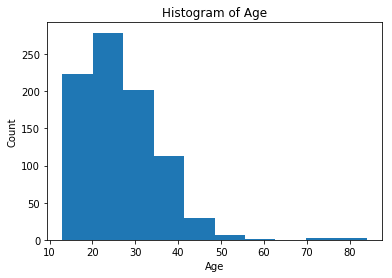

In [26]:
plt.hist(cervical_cancer_data['age'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Age")
plt.show()

/Users/paytonk/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/paytonk/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Users/paytonk/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/Users/paytonk/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/Users/paytonk/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


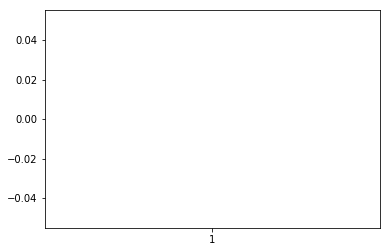

In [27]:
plt.boxplot(cervical_cancer_data['number_of_sexual_partners'])
plt.show()

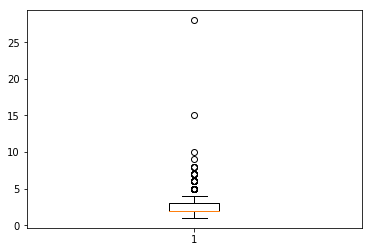

In [28]:
plt.boxplot(cervical_cancer_data['number_of_sexual_partners'][~np.isnan(cervical_cancer_data['number_of_sexual_partners'])])
plt.show()

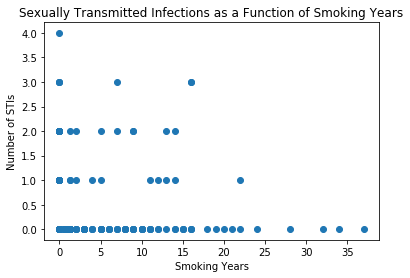

In [29]:
plt.scatter(cervical_cancer_data['smokes_years'], cervical_cancer_data['stds_number'])
plt.xlabel("Smoking Years")
plt.ylabel("Number of STIs")
plt.title("Sexually Transmitted Infections as a Function of Smoking Years")
plt.show()

### Let's plot a correlation heatmap!

In [33]:
corr = cervical_cancer_data.corr()
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.rcParams["figure.figsize"] =(15,10)
plt.show()

### Ugh, that's not great.  Let's try a different tack, using a table with a gradient background:

In [23]:
corr = cervical_cancer_data.corr()
corr.style.background_gradient()

/Users/paytonk/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [34]:
pd.crosstab(cervical_cancer_data['dx_cancer'], cervical_cancer_data['stds_genital_herpes'])

stds_genital_herpes  False  True 
dx_cancer                        
False                  734    106
True                    18      0

In [36]:
cervical_cancer_data.isna().sum()

age                                     0
number_of_sexual_partners              26
first_sexual_intercourse                7
num_of_pregnancies                     56
smokes                                  0
smokes_years                           13
smokes_packs_year                      13
hormonal_contraceptives                 0
hormonal_contraceptives_years         108
iud                                     0
iud_years                             117
stds                                    0
stds_number                           105
stds_condylomatosis                     0
stds_cervical_condylomatosis            0
stds_vaginal_condylomatosis             0
stds_vulvo_perineal_condylomatosis      0
stds_syphilis                           0
stds_pelvic_inflammatory_disease        0
stds_genital_herpes                     0
stds_molluscum_contagiosum              0
stds_aids                               0
stds_hiv                                0
stds_hepatitis_b                  